The given dataset contains various attributes related to individual music tracks. Key features include:

Energy: A measure of intensity and activity.
Valence: A measure of the musical positiveness conveyed by a track.
Danceability: Describes how suitable a track is for dancing.
Loudness: Overall loudness of a track in decibels (dB).
Acousticness: Confidence measure of whether the track is acoustic.
Tempo: The speed or pace of a given piece, measured in beats per minute (BPM).
Speechiness: Measures the presence of spoken words in a track.
Liveness: Detects the presence of an audience in the recording.
Popularity: The target variable indicating the popularity score of the track.
The dataset includes 227 music tracks, each described by the above features along with additional metadata like track name, artists, album name, and release date.

Problem :

The objective is to develop a predictive model that can accurately estimate the popularity of music tracks based on their audio features. Accurate predictions of music popularity can assist music streaming platforms in better understanding user preferences, enhancing recommendation systems, and optimizing playlists to boost user engagement.
Specifically, the goal is to build a regression model using machine learning techniques to predict the popularity score of a track by finding the most relevant features.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error

In [45]:
d1 = pd.read_csv("Spotify_data.csv")
d1

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,222,Tu Chahiye,"Pritam, Atif Aslam",Bajrangi Bhaijaan,4nZOPP0atfJbBlkedLYi7t,3aaiAWCet6sbfOfLSn3g7i,66,2015-07-07,272680,False,...,0.744,7,-5.817,1,0.0446,0.4030,0.000000,0.0853,0.415,134.068
223,223,"Aabaad Barbaad (From ""Ludo"")","Pritam, Arijit Singh","Aabaad Barbaad (From ""Ludo"")",1PzsfgcbPbiW7uflc9Zi5Z,0hFUtSsV2itYEUTZGj6w5H,58,2020-10-21,309103,False,...,0.522,7,-5.857,1,0.0317,0.6860,0.000000,0.4100,0.628,118.001
224,224,Jag Ghoomeya,"Vishal-Shekhar, Rahat Fateh Ali Khan, Irshad K...",Sultan,0tAi6H8acUKefYMIEuxcMA,4KCbZcshgibfJSCAkg87Lv,62,2016-05-31,281992,False,...,0.565,11,-7.954,1,0.0347,0.4790,0.000002,0.1050,0.607,82.653
225,225,"Tumhe Kitna Pyaar Karte (From ""Bawaal"")","Mithoon, Arijit Singh, Manoj Muntashir","Tumhe Kitna Pyaar Karte (From ""Bawaal"")",20zQZcEhMLsDUn1LhPCEFY,03hJuEQpEQERrHpjcXKWzJ,65,2023-07-07,305232,False,...,0.374,10,-9.849,0,0.0328,0.9240,0.000008,0.0840,0.388,101.855


In [46]:
d1.head()

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019


In [59]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        227 non-null    object 
 1   Artists           227 non-null    object 
 2   Album Name        227 non-null    object 
 3   Album ID          227 non-null    object 
 4   Track ID          227 non-null    object 
 5   Popularity        227 non-null    int64  
 6   Release Date      227 non-null    object 
 7   Duration (ms)     227 non-null    int64  
 8   Explicit          227 non-null    bool   
 9   External URLs     227 non-null    object 
 10  Danceability      227 non-null    float64
 11  Energy            227 non-null    float64
 12  Key               227 non-null    int64  
 13  Loudness          227 non-null    float64
 14  Mode              227 non-null    int64  
 15  Speechiness       227 non-null    float64
 16  Acousticness      227 non-null    float64
 1

EDA

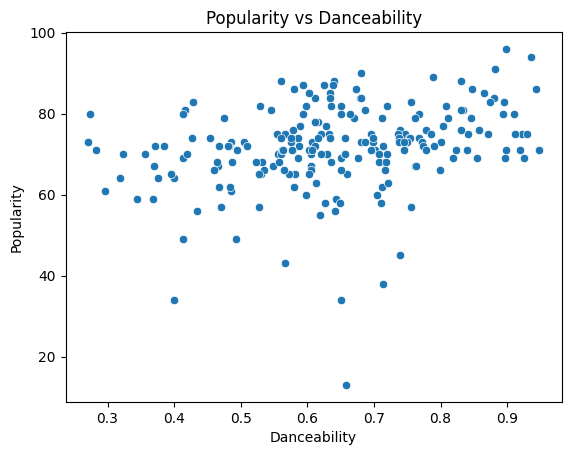

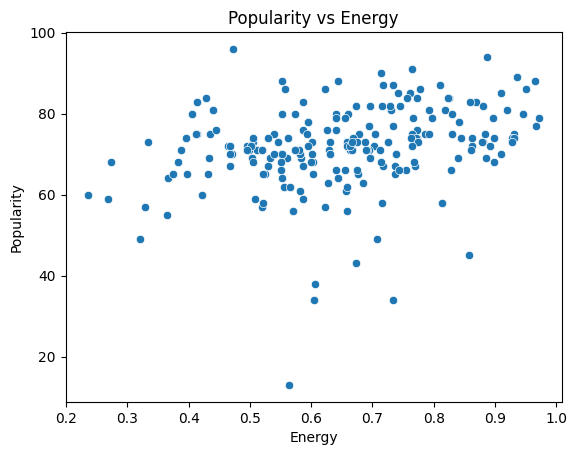

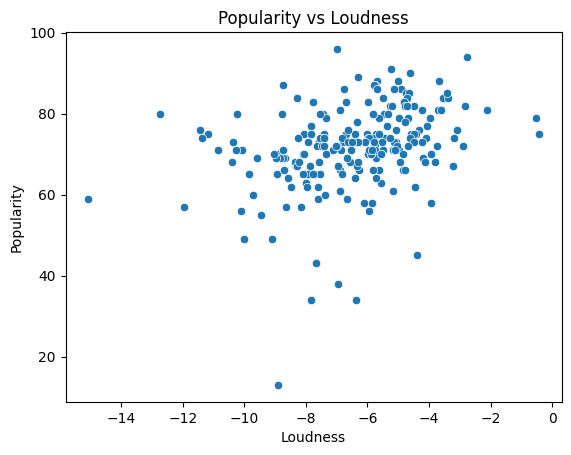

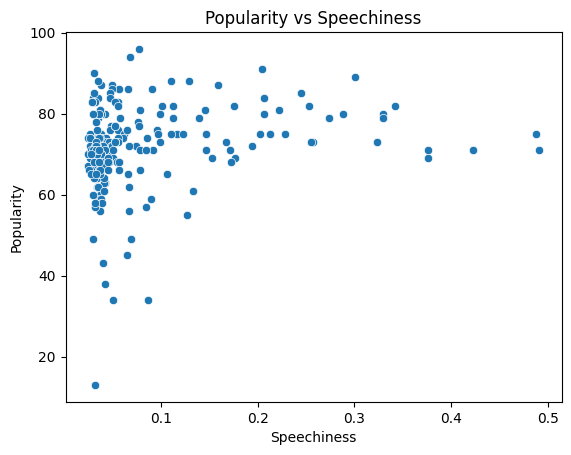

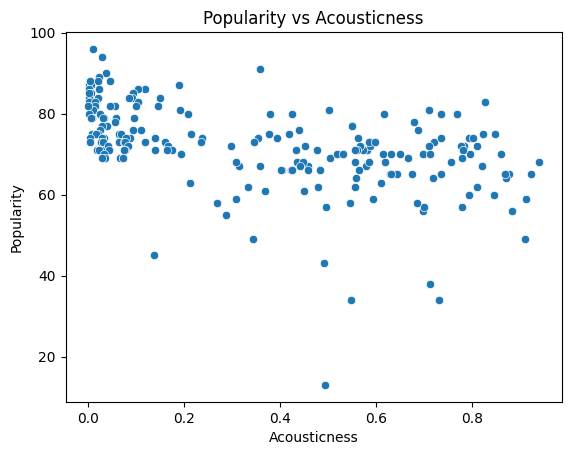

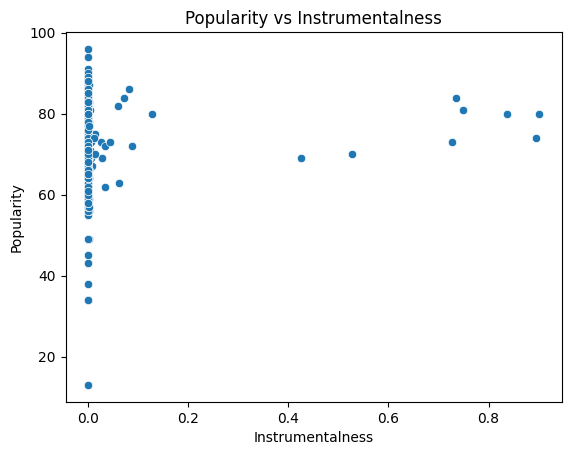

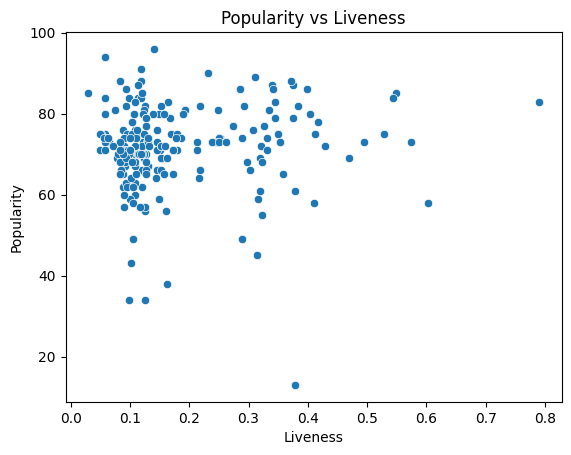

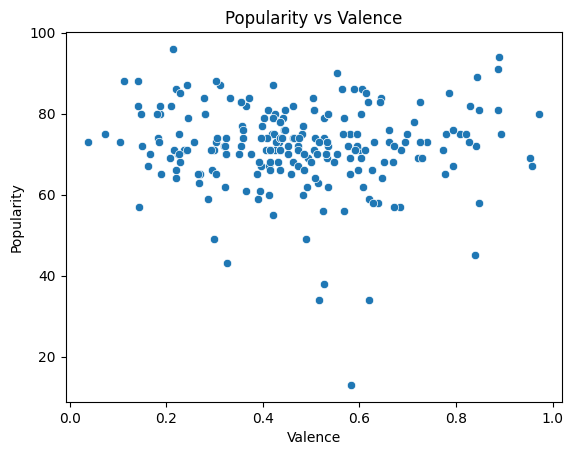

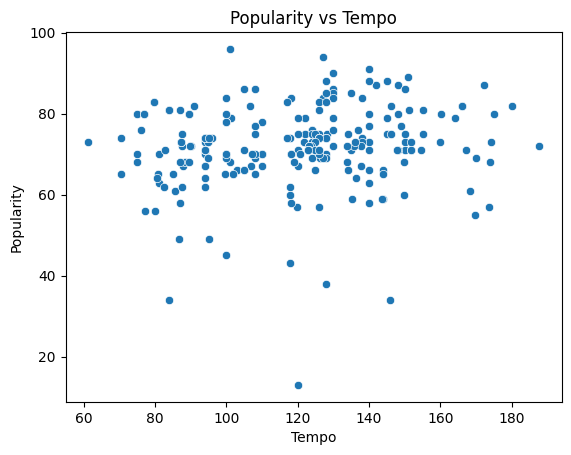

In [29]:
# EDA
features = ['Danceability', 'Energy','Loudness','Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo']
for feature in features:
    sns.scatterplot(data= d1, x = feature, y = 'Popularity')
    plt.title(f'Popularity vs {feature}')
    plt.show()

correlation matrix

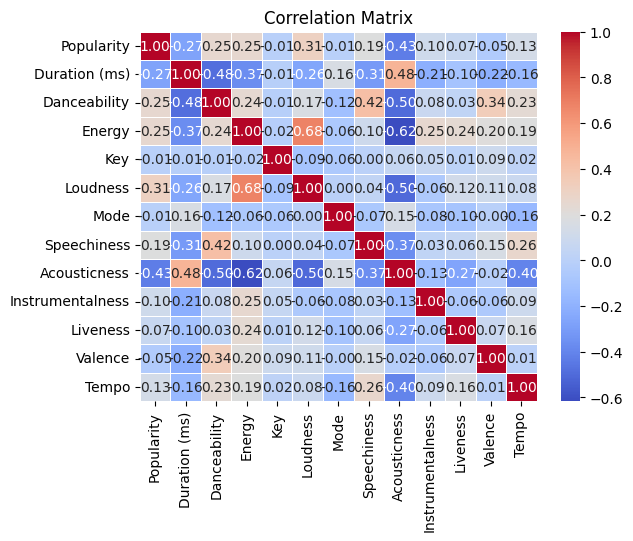

In [33]:
numeric_columns = d1.select_dtypes(include=['float64', 'int64']).columns
numeric_data = d1[numeric_columns]
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

distributions

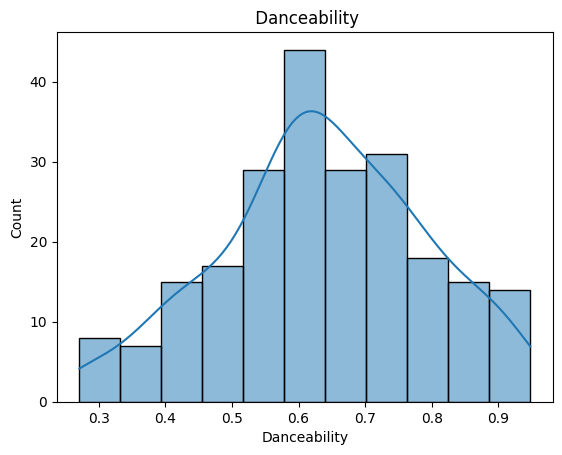

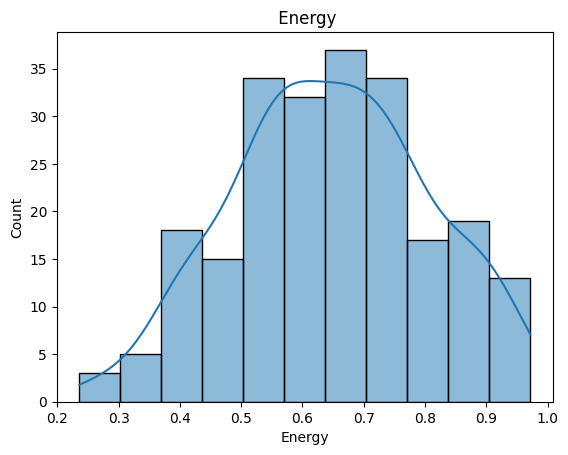

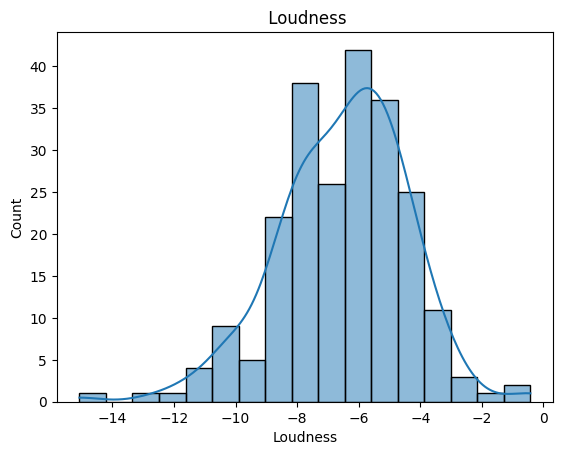

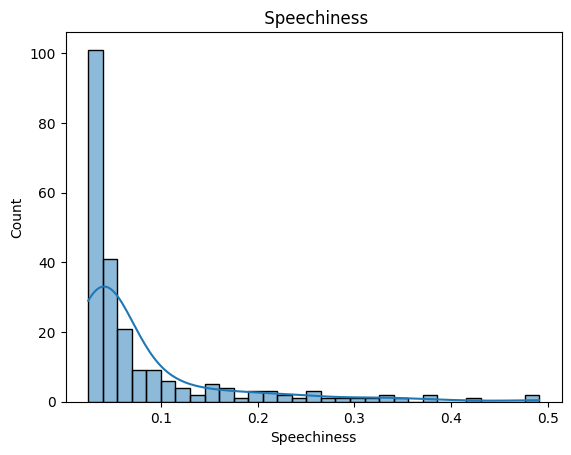

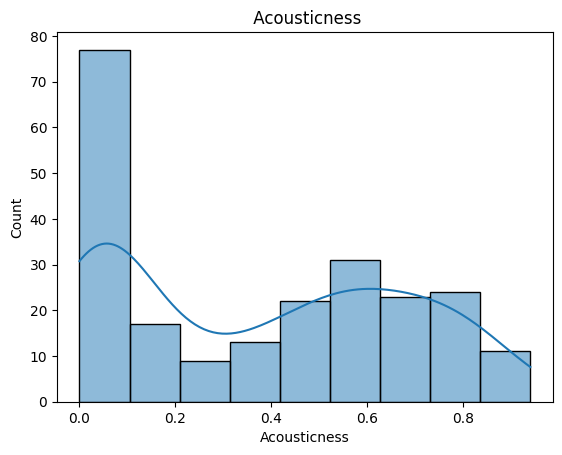

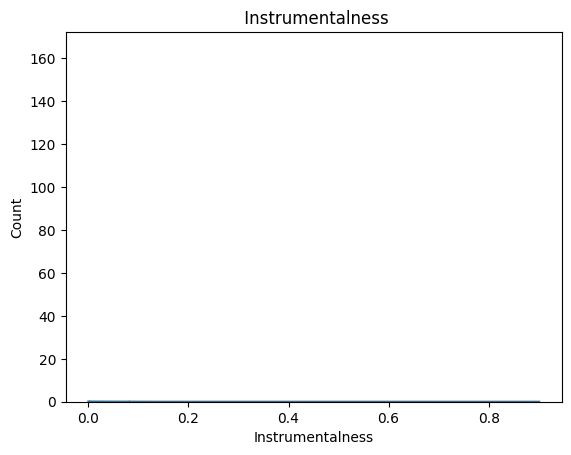

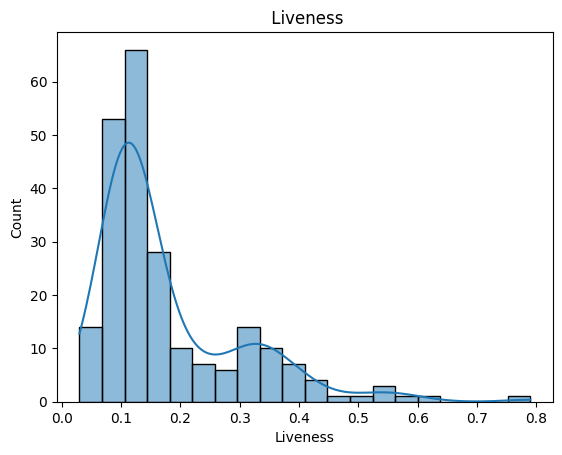

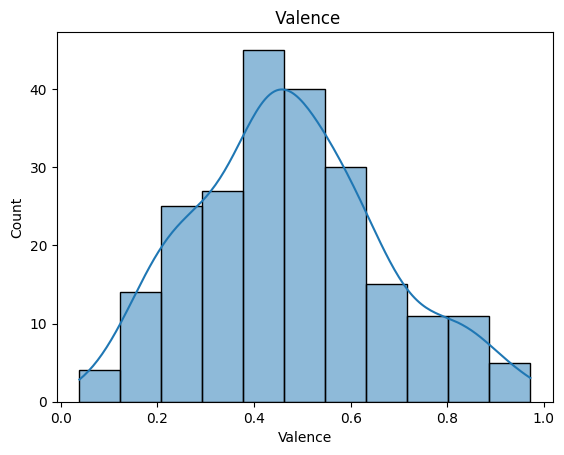

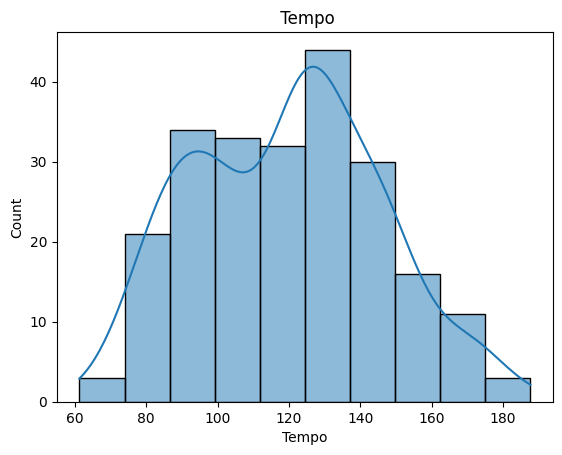

In [37]:
for feature in features:
    sns.histplot(data= d1, kde= True, x = feature)
    plt.title(f' {feature}')
    plt.show()

OUTLIER DETETION

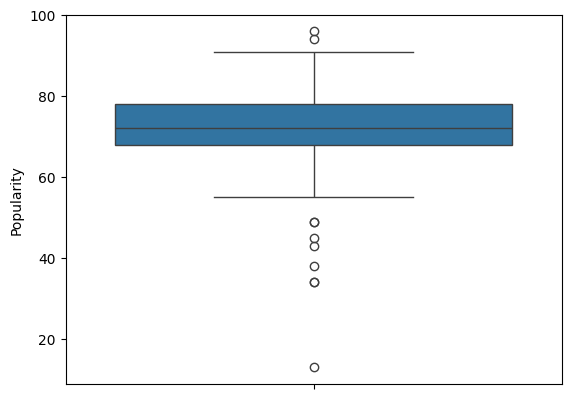

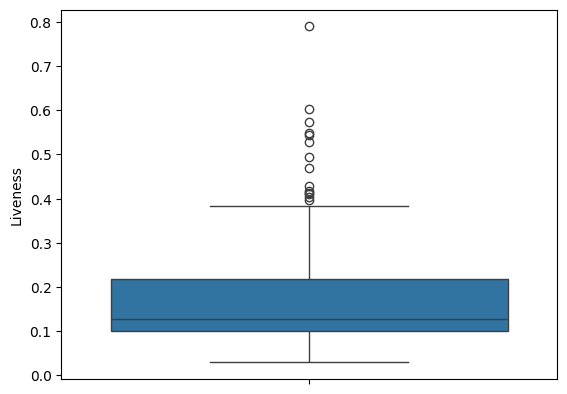

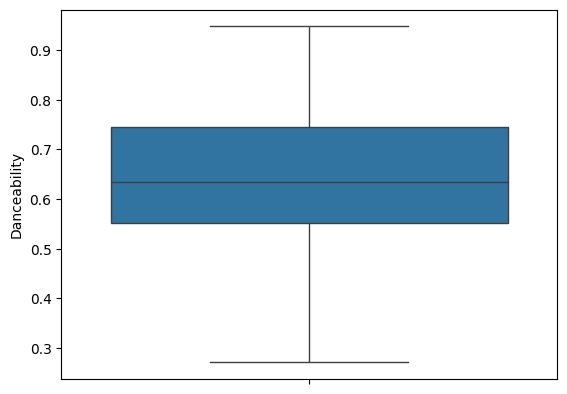

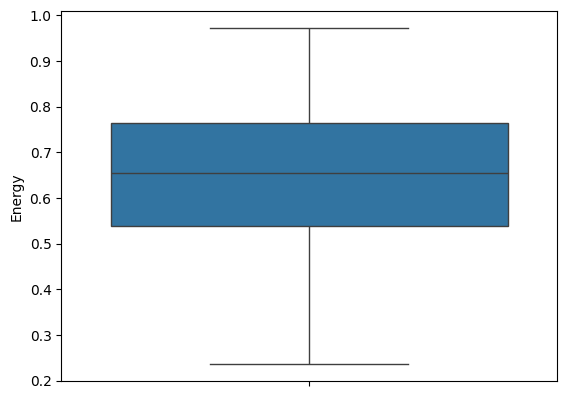

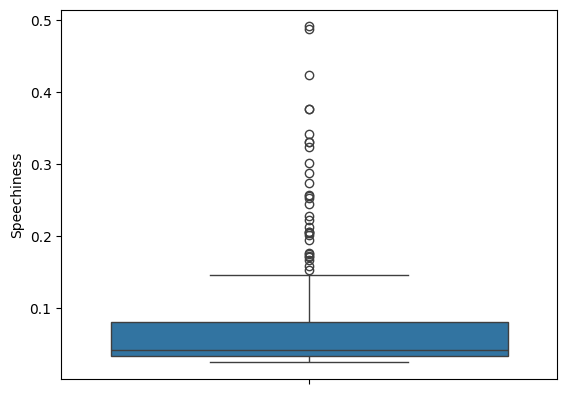

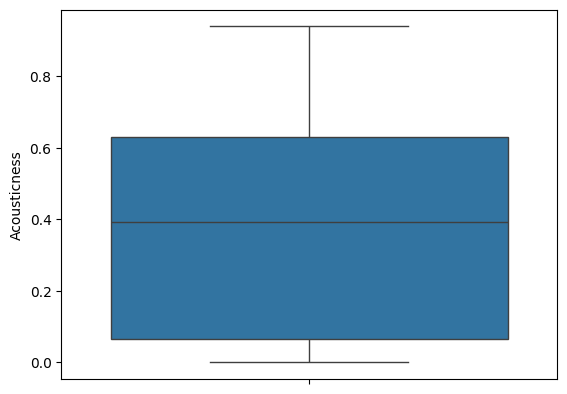

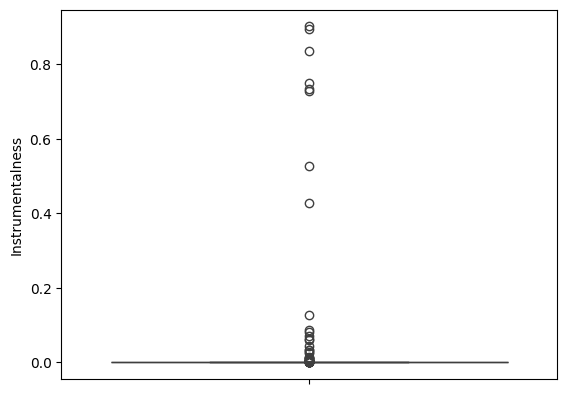

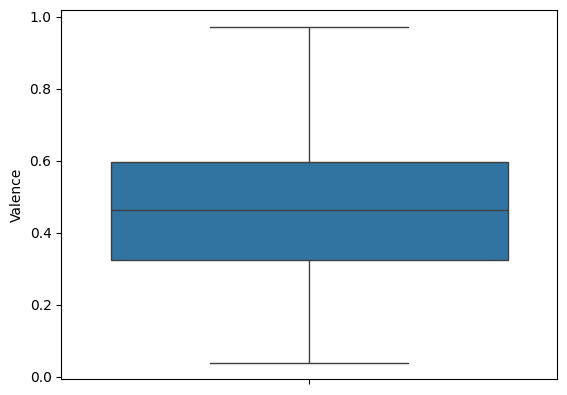

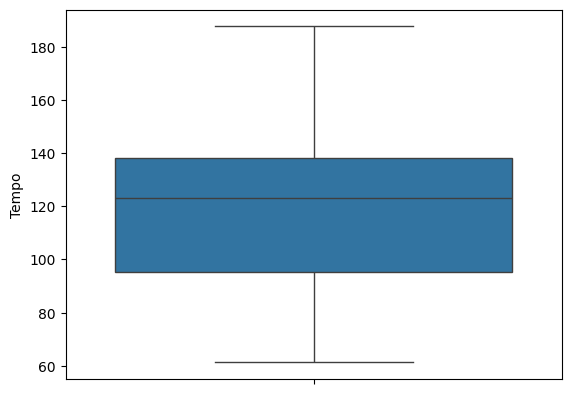

In [78]:
sns.boxplot(d1['Popularity'])
plt.show()

# Handling outliers
# Can transform, remove, cap the outlier
sns.boxplot(d1['Liveness'])
plt.show()

sns.boxplot(d1['Danceability'])
plt.show()

sns.boxplot(d1['Energy'])
plt.show()

sns.boxplot(d1['Speechiness'])
plt.show()

sns.boxplot(d1['Acousticness'])
plt.show()

sns.boxplot(d1['Instrumentalness'])
plt.show()

sns.boxplot(d1['Valence'])
plt.show()

sns.boxplot(d1['Tempo'])
plt.show()

random forest

In [39]:
d1.columns

Index(['Track Name', 'Artists', 'Album Name', 'Album ID', 'Track ID',
       'Popularity', 'Release Date', 'Duration (ms)', 'Explicit',
       'External URLs', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo'],
      dtype='object')

In [69]:
# select the features and target variable
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness', 'Tempo', 'Speechiness', 'Liveness']
X = d1[features]
y = d1['Popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# define the parameter grid for Random Forest
param_grid = {'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, refit=True, verbose=2, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; 

C:\Users\jetti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jetti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jetti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

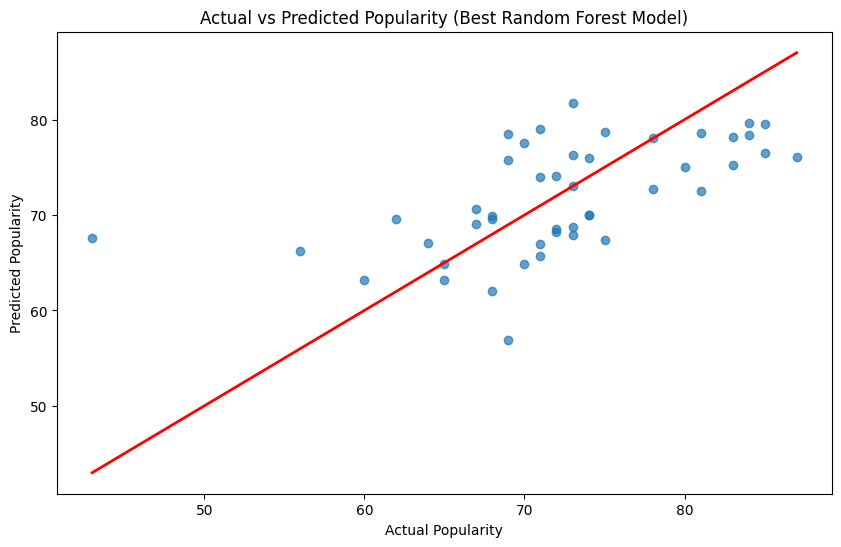

In [71]:
# make predictions
y_pred_best_rf = best_rf_model.predict(X_test_scaled)
plt.scatter(y_test, y_pred_best_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity (Best Random Forest Model)')
plt.show()